In [1]:
cd /Users/rodrickleary/Downloads

/Users/rodrickleary/Downloads


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('OSMI Mental Health in Tech Survey 2018.csv')

In [3]:
data = data.dropna(subset=['Is your employer primarily a tech company/organization?', 'What is your gender?' ])

In [4]:
target_for_values = {
    'MALE': ['m', 'Ostensibly Male', 'male, born with xy chromosoms', 'malel', 'Trans man', 'Cis-male', 'M', 'Cis Male', 'cis male', 'Malel', 'Male '], 
    'FEMALE': ['f', 'F', 'Cis female ', 'Female', 'Woman', 'I identify as female', '*shrug emoji* (F)', 'Cis woman', 'Cis-Female', 'She/her/they/them', 'cisgender female', 'Cisgendered woman', 'Female (cisgender)', 'woman']}

for k, v in target_for_values.items():
    data.loc[data['What is your gender?'].isin(v), 'What is your gender?'] = k

In [5]:
data['What is your gender?'] = data['What is your gender?'].str.upper()

In [6]:
data['What is your gender?'] = data['What is your gender?'].str.strip()

In [7]:
MF= (data['What is your gender?']=='MALE') | (data['What is your gender?']=='FEMALE')
data_MF = data[MF]

In [8]:
data_MF['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'].value_counts()

No              134
Yes             110
I don't know     95
Name: Does your employer offer resources to learn more about mental health disorders and options for seeking help?, dtype: int64

In [9]:
data_MF['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'].value_counts(normalize=True)

No              0.395280
Yes             0.324484
I don't know    0.280236
Name: Does your employer offer resources to learn more about mental health disorders and options for seeking help?, dtype: float64

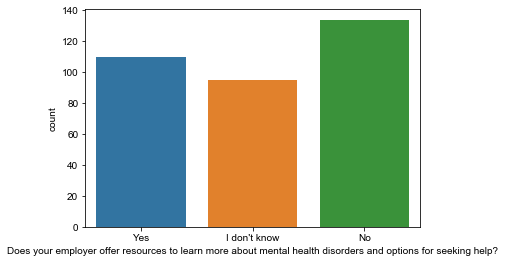

In [10]:
sns.countplot(x='Does your employer offer resources to learn more about mental health disorders and options for seeking help?', data=data_MF)
sns.set(rc={'figure.figsize':(15,7)})

In [11]:
data_MF['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts(normalize=True)

No              0.634218
Yes             0.277286
I don't know    0.088496
Name: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?, dtype: float64

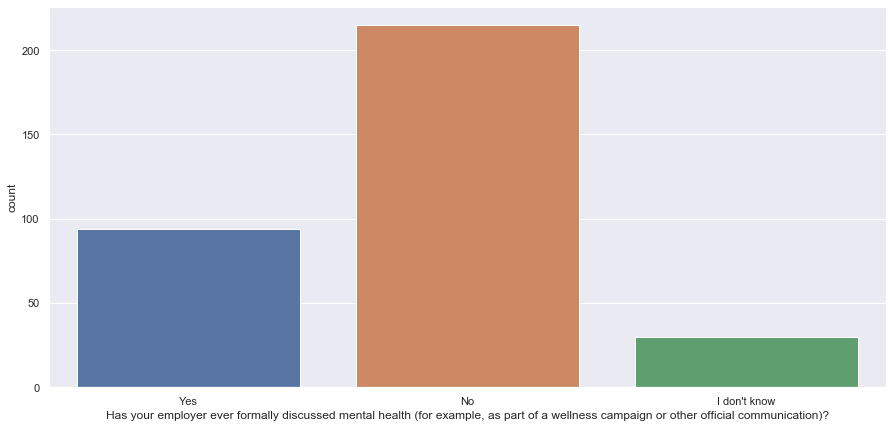

In [12]:
sns.countplot(x='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', data=data_MF)
sns.set(rc={'figure.figsize':(15,7)})

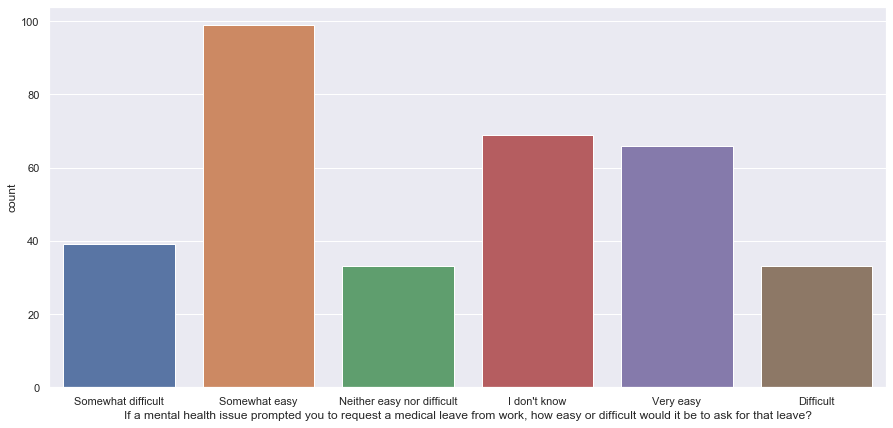

In [13]:
sns.countplot(x='If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',  data=data_MF)
sns.set(rc={'figure.figsize':(15,7)})

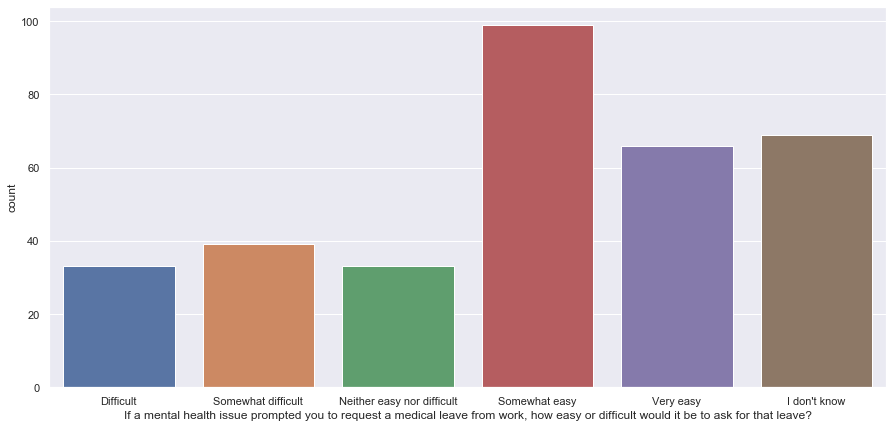

In [14]:
sns.countplot(x='If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', order=['Difficult','Somewhat difficult','Neither easy nor difficult','Somewhat easy','Very easy',"I don't know"], data=data_MF)
sns.set(rc={'figure.figsize':(15,7)})

In [15]:
q1 = data_MF.groupby('What is your gender?', as_index=False)['Overall, how much importance did your previous employer place on physical health?'].mean()
display(q1)

,What is your gender?,"Overall, how much importance did your previous employer place on physical health?"
0,FEMALE,5.168317
1,MALE,5.360825


In [16]:
from scipy.stats import ttest_ind
data_MF = data_MF.dropna(subset=['Overall, how much importance did your previous employer place on mental health?', 'Overall, how much importance did your previous employer place on physical health?'])
Female = data_MF[data_MF['What is your gender?'] == 'FEMALE']['Overall, how much importance did your previous employer place on physical health?']
Male = data_MF[data_MF['What is your gender?'] == 'MALE']['Overall, how much importance did your previous employer place on physical health?']
ttest_ind(Female, Male)

Ttest_indResult(statistic=-0.6225491540884329, pvalue=0.5340650294185965)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

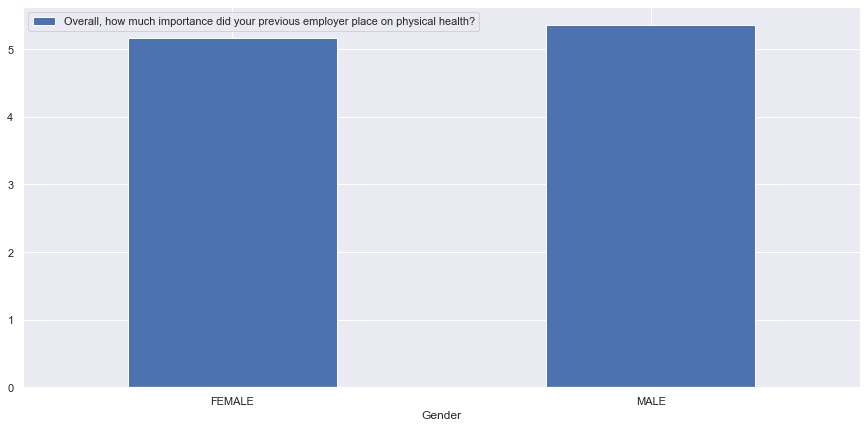

In [17]:
q1.plot.bar(x= 'What is your gender?')
plt.xlabel('Gender')
plt.xticks(rotation=0)

In [18]:
q2 = data_MF.groupby('What is your gender?', as_index=False)['Overall, how much importance did your previous employer place on mental health?'].mean()
display(q2)

,What is your gender?,"Overall, how much importance did your previous employer place on mental health?"
0,FEMALE,2.970297
1,MALE,3.639175


In [19]:
from scipy.stats import ttest_ind
Female = data_MF[data_MF['What is your gender?'] == 'FEMALE']['Overall, how much importance did your previous employer place on mental health?']
Male = data_MF[data_MF['What is your gender?'] == 'MALE']['Overall, how much importance did your previous employer place on mental health?']
ttest_ind(Female, Male)

Ttest_indResult(statistic=-2.091908699719794, pvalue=0.03730731399857584)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

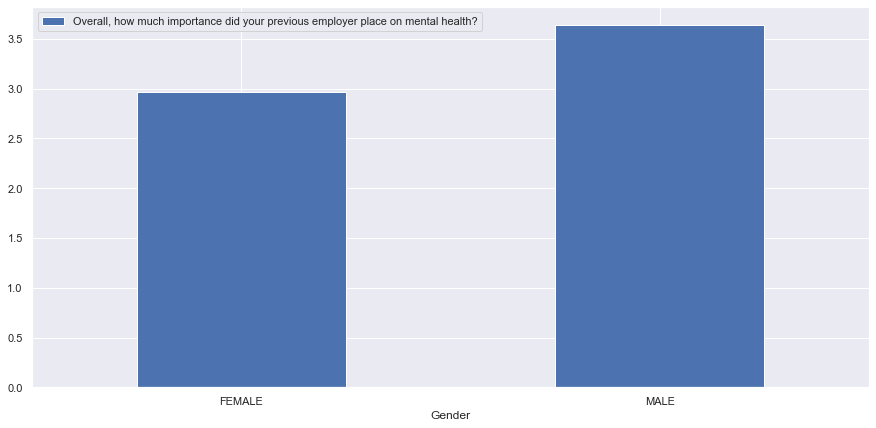

In [20]:
q2.plot.bar(x= 'What is your gender?')
plt.xlabel('Gender')
plt.xticks(rotation=0)

In [21]:
q3 = data_MF.groupby('Is your employer primarily a tech company/organization?', as_index=False)['Overall, how much importance did your previous employer place on physical health?'].mean()
display(q3)

,Is your employer primarily a tech company/organization?,"Overall, how much importance did your previous employer place on physical health?"
0,0.0,4.987179
1,1.0,5.405530


In [22]:
Nontech = data_MF[data_MF['Is your employer primarily a tech company/organization?'] == 0.0]['Overall, how much importance did your previous employer place on physical health?']
Tech = data_MF[data_MF['Is your employer primarily a tech company/organization?'] == 1.0]['Overall, how much importance did your previous employer place on physical health?']
ttest_ind(Nontech, Tech)

Ttest_indResult(statistic=-1.2599905901895465, pvalue=0.20867538310384395)

([<matplotlib.axis.XTick at 0x1a16946048>,
 <a list of 2 Text xticklabel objects>)

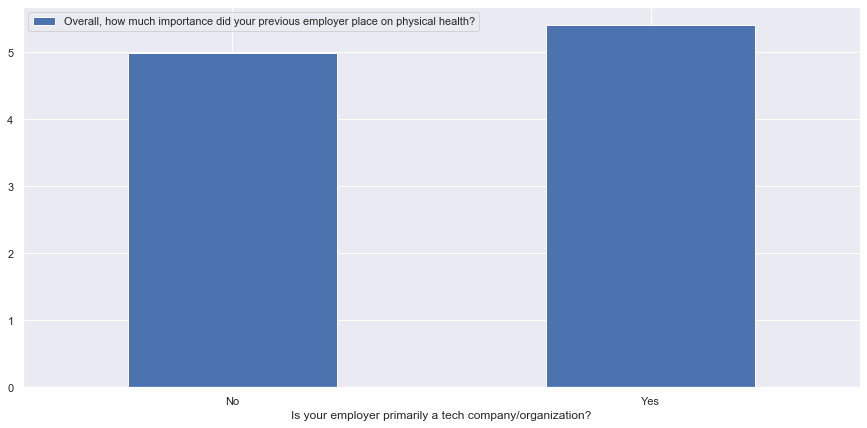

In [23]:
q3.plot.bar(x= 'Is your employer primarily a tech company/organization?')
plt.xlabel('Is your employer primarily a tech company/organization?')
plt.xticks(rotation=0)
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0)

In [24]:
q4 = data_MF.groupby('Is your employer primarily a tech company/organization?', as_index=False)['Overall, how much importance did your previous employer place on mental health?'].mean()
display(q4)

,Is your employer primarily a tech company/organization?,"Overall, how much importance did your previous employer place on mental health?"
0,0.0,2.987179
1,1.0,3.562212


In [25]:
Nontech = data_MF[data_MF['Is your employer primarily a tech company/organization?'] == 0.0]['Overall, how much importance did your previous employer place on mental health?']
Tech = data_MF[data_MF['Is your employer primarily a tech company/organization?'] == 1.0]['Overall, how much importance did your previous employer place on mental health?']
ttest_ind(Nontech, Tech)

Ttest_indResult(statistic=-1.6669947248558878, pvalue=0.09658395442959435)

([<matplotlib.axis.XTick at 0x1a16b26d68>,
 <a list of 2 Text xticklabel objects>)

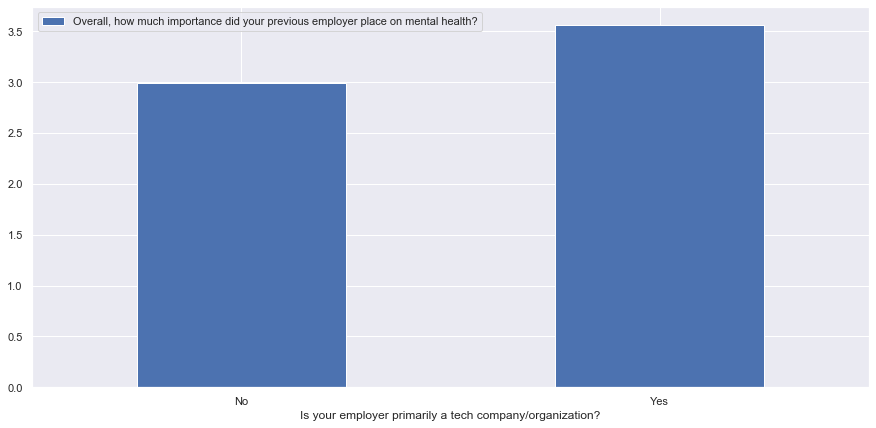

In [26]:
q4.plot.bar(x= 'Is your employer primarily a tech company/organization?')
plt.xlabel('Is your employer primarily a tech company/organization?')
plt.xticks(rotation=0)
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0)

In [27]:
data_MF['How many employees does your company or organization have?'] = data_MF['How many employees does your company or organization have?'].str.strip()
q5 = data_MF.groupby('How many employees does your company or organization have?', as_index=False)['Overall, how much importance did your previous employer place on mental health?'].mean()
display(q5)

,How many employees does your company or organization have?,"Overall, how much importance did your previous employer place on mental health?"
0,1-5,2.800000
1,100-500,3.614286
2,26-100,3.672414
3,500-1000,2.888889
4,6-25,3.807018
5,More than 1000,2.961538


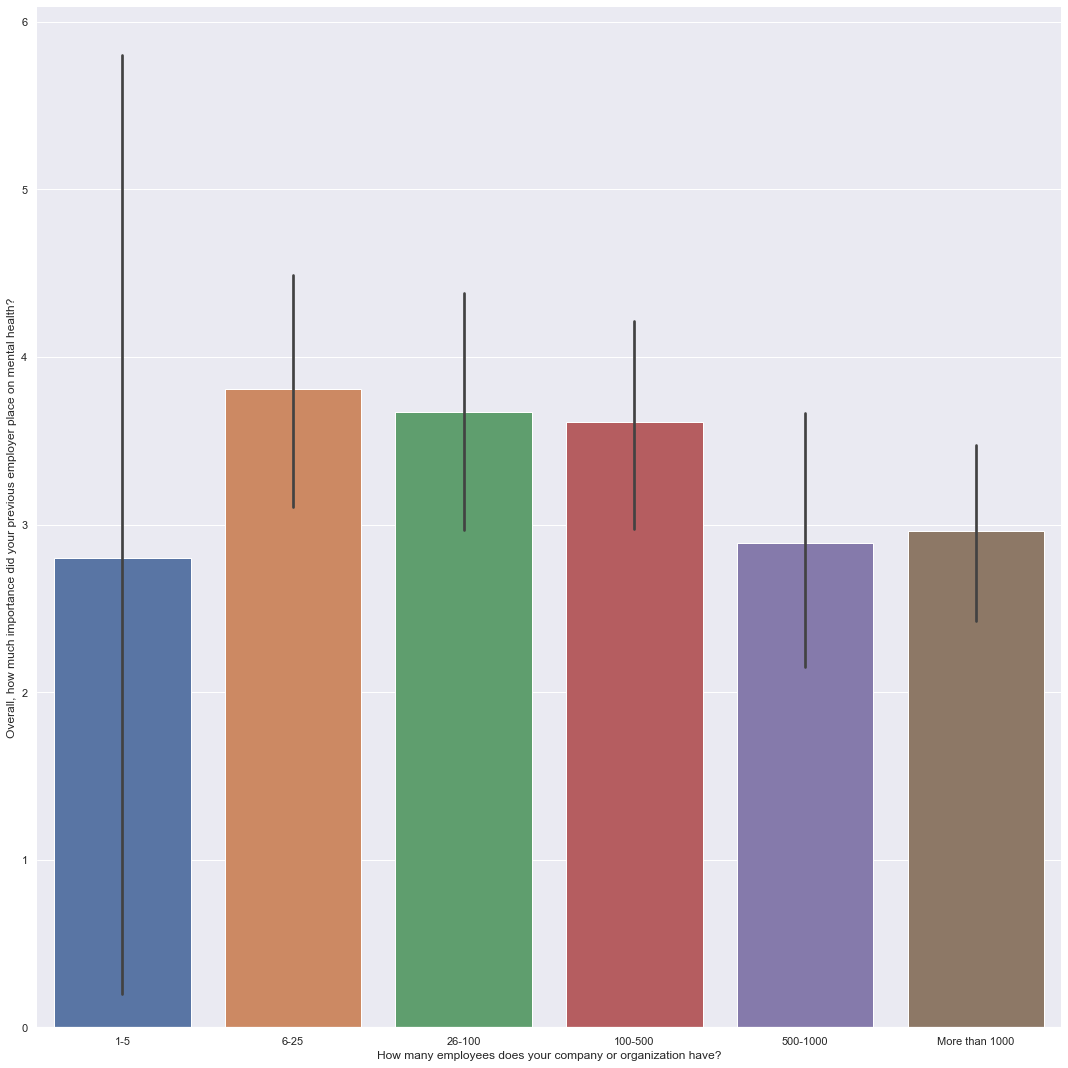

In [28]:
q5 = sns.catplot(x="How many employees does your company or organization have?", y = 'Overall, how much importance did your previous employer place on mental health?', data=data_MF, order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], height=15, kind="bar")
q5.despine(left=True)

In [29]:
q6 = data_MF.groupby('How many employees does your company or organization have?', as_index=False)['Overall, how much importance did your previous employer place on physical health?'].mean()
display(q6)

,How many employees does your company or organization have?,"Overall, how much importance did your previous employer place on physical health?"
0,1-5,3.800000
1,100-500,5.357143
2,26-100,5.655172
3,500-1000,5.629630
4,6-25,5.140351
5,More than 1000,5.064103


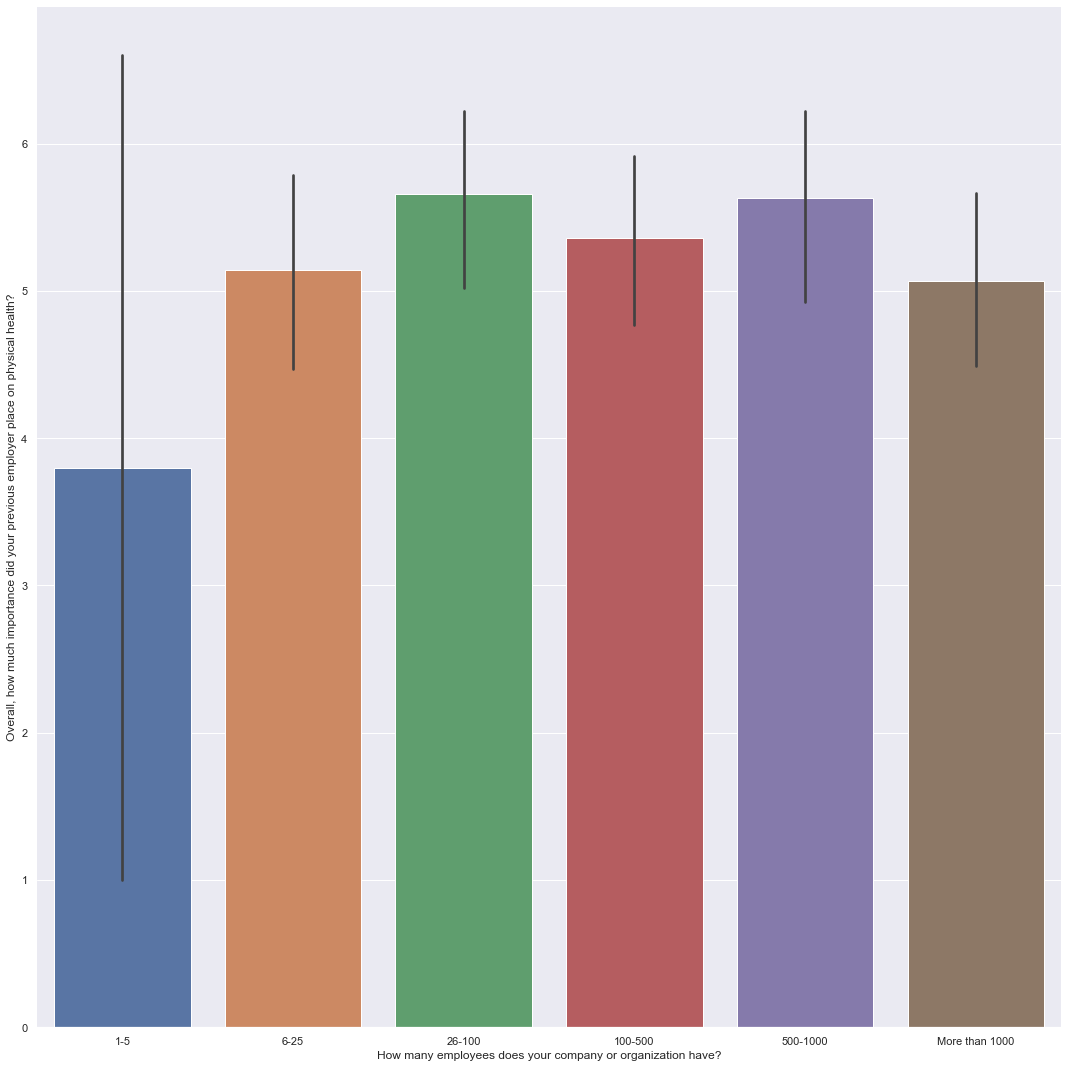

In [30]:
q6 = sns.catplot(x="How many employees does your company or organization have?", y = 'Overall, how much importance did your previous employer place on physical health?', data=data_MF, order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], height=15, kind="bar")
q6.despine(left=True)

In [31]:
Mental_Health = data_MF['Overall, how much importance did your previous employer place on mental health?']
Physical_Health = data_MF['Overall, how much importance did your previous employer place on physical health?']
ttest_ind(Mental_Health, Physical_Health)

Ttest_indResult(statistic=-8.907787894616964, pvalue=6.477202945619518e-18)

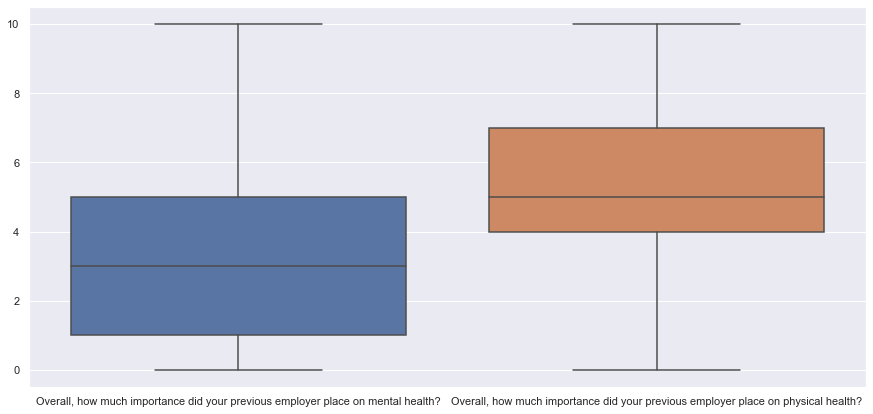

In [32]:
MH_PH = data_MF[['Overall, how much importance did your previous employer place on mental health?', 'Overall, how much importance did your previous employer place on physical health?']].copy()
sns.boxplot(data=MH_PH)

# The Problem

The OSMI Mental Health in Tech Survey for 2018 found that regardless of whether or not individuals work for a tech company or not, employees rate that their employers are more concerned with their physical health than their mental health. Our company, Vortex, would like employees to know that they are equally concerned with their physical and mental health. The employee health department develops a new programming track they feel provides high quality mental and physical health programming for employees that they would like to make mandatory for all employees. However, before the programming track is made mandatory for all employees, I would like to test its effectiveness. In order to do this, I'll conduct an A/B test comparing the new programming track with the existing programs already in place.

# Potential Solution

The new employee programming track will increase how employees rate their employers concern for employee mental health by increasing mental health resources employees will be provided with.

The new employee programming track will eliminate the gap between how much employees believe their employers are concerned for their mental health versus how much employees believe their employers are concerned for their physical health.

# Before the Rollout

All current employees will be asked to complete surveys prior to the start of the study. These surveys will be designed to track age, department, race, gender, amount of time spent working at Vortex, current employee perceptions of employer concern for mental health, and current employee perceptions of employer concern for physical health. Results from this survey will be used to randomly assign all current employees to receive either the current or new employee health programming track. This results of this survey will be used to ensure that both groups are similar with regards to the listed variables before the study commences.

# Rollout Plan

This study will rely on a gradual rollout plan. Three weeks before the beginning of the new fiscal year, 10% of each group will start their respective programming tracks. After two weeks, employees will be required to complete a similar survey to the one they completed before the study. This date will be used to evaulate both tracks for any issues that have arisen with data collection or employee participation. The last week before the beginning of the new fiscal year will be spent correcting any issues discovered during this period. At the beginning of the new fiscal year, the remainder of employees will in both groups will begin their respective programming tracks. After six months, all employees will be required to complete a version of the survey they completed before the study began.

# Success Metric

Employee perception of employer concern for employee mental health increase by a value that is statistically significant (p<.05).

There is no significant difference between employee perception of employer concern for employee mental health and employee perception of employer concern for employee physical health (p>.05).

# Secondary Metrics

Secondary metrics that will be looked at during this study are employee satisfaction, level of professional stress, and level of personal stress.

# Other Notes

Employees who begin after the beginning of the physical year will be randomly assigned to conditions and asked to complete surveys at the end of the study. Data from these employees will not be included in the main analysis of this study. However, secondary data analysis will be conducted to explore whether or not there are any differences between individuals who were employees at the start of the study and those who were employed after the study began. Employees whose employment status is terminated for whatever reason during this study will be not be included in the final results. Data from surveys completed before the start of the study will be used to evaluate individuals who left the company during the study for similarities.

# Experimental Wrap Up

At the end of six months, employees will be required to complete a post test survey. Afterwards, the data will be analyzed and both programming tracks will be evaluated.